##GUVI--FINAL PROJECT(sales_forecasting)USING TIME SERIES FORCASTING:

#TASK

#1Predict the department-wide sales for each store for the following year
#2Model the effects of markdowns on holiday weeks
#3Provide recommended actions based on the insights drawn, with prioritization

In [70]:
#Import necessary libraries for data analysis, visualization, and model evaluation

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [71]:
# Load the retail sales dataset from a CSV file

df=pd.read_csv(r'/content/retail_sales_final.csv')

In [72]:
#Display summary information about the DataFrame, including data types and non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551479 entries, 0 to 551478
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   day           551479 non-null  int64  
 1   month         551479 non-null  int64  
 2   year          551479 non-null  int64  
 3   Store         551479 non-null  int64  
 4   Dept          551479 non-null  int64  
 5   Type          551479 non-null  int64  
 6   Size          551479 non-null  int64  
 7   IsHoliday     551479 non-null  int64  
 8   Temperature   551479 non-null  float64
 9   Fuel_Price    551479 non-null  float64
 10  MarkDown1     551479 non-null  float64
 11  MarkDown2     551479 non-null  float64
 12  MarkDown3     551479 non-null  float64
 13  MarkDown4     551479 non-null  float64
 14  MarkDown5     551479 non-null  float64
 15  Weekly_Sales  551479 non-null  float64
 16  CPI           551479 non-null  float64
 17  Unemployment  551479 non-null  float64
dtypes: f

In [73]:
# Display the first five rows of the DataFrame to get an overview of the dataset

df.head()

,day,month,year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Weekly_Sales,CPI,Unemployment
0,5,2,2010,1,1,1,151315,0,42.31,2.572,5426.0603,6845.5920,163.2210,27383.5099,4786.6602,24924.50,211.096358,8.106
1,12,2,2010,1,1,1,151315,1,38.51,2.548,57941.1287,6845.5920,100.9448,15065.0389,4338.1224,46039.49,211.242170,8.106
2,19,2,2010,1,1,1,151315,0,39.93,2.514,45614.1475,13058.1425,39.9414,12528.5827,4025.0915,41595.55,211.289143,8.106
3,26,2,2010,1,1,1,151315,0,46.63,2.561,45459.4313,11118.8165,63.0210,3357.9503,5534.3705,19403.54,211.319643,8.106
4,5,3,2010,1,1,1,151315,0,46.50,2.625,7070.9750,1610.0297,144.9571,22656.5501,5834.9823,21827.90,211.350143,8.106


In [74]:
# Combine 'day', 'month', and 'year' columns into a single 'date' column as a string
df['date']=df['day'].astype(str)+'-'+df['month'].astype(str)+'-'+df['year'].astype(str)

# Convert the 'date' column to a datetime format, handling any conversion errors
df['date']=pd.to_datetime(df['date'],format='%d-%m-%Y',errors='coerce')

# Drop the original 'day', 'month', and 'year' columns as they are no longer needed
df.drop(columns=['day','month','year'],axis=1,inplace=True)

In [75]:
# Filter the DataFrame to include only rows where 'Store' is 1 and 'Dept' is 2

store1_df = df[(df['Store'] == 1) &(df['Dept'] == 2) ]

<Axes: >

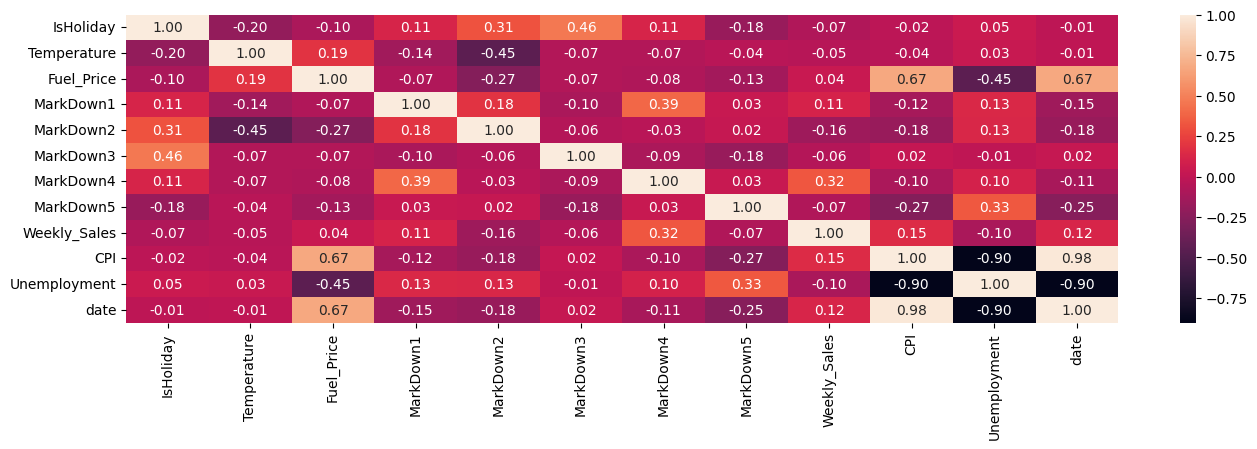

In [76]:
# Plot heatmap of store1_df correlation (excluding non-numeric columns).

plt.figure(figsize=(16,4))

corr=store1_df.drop(columns=['Store', 'Dept', 'Type', 'Size']).corr()

sns.heatmap(corr,annot=True,fmt='.2f')

<Axes: xlabel='ds'>

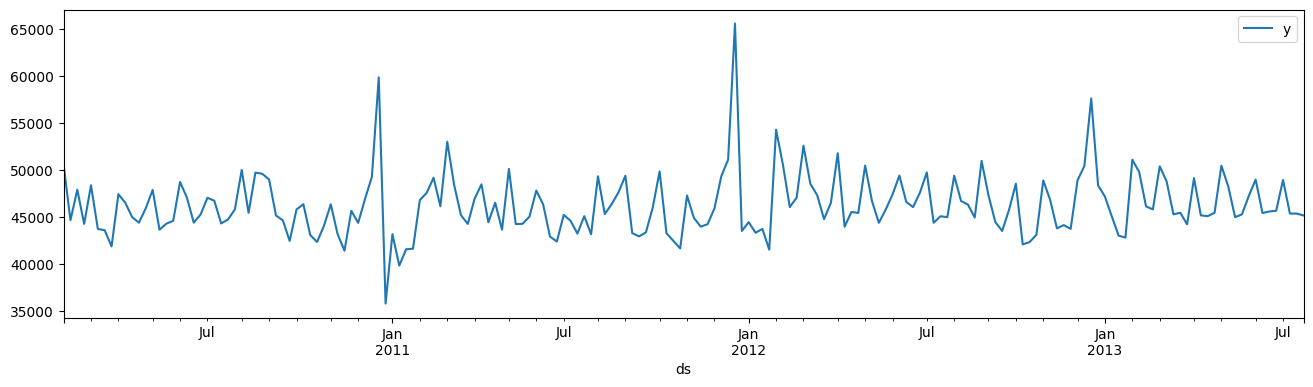

In [77]:
# Create a Prophet-compatible DataFrame (prop_df) from store1_df,
# selecting relevant columns and renaming 'date' to 'ds' and 'Weekly_Sales' to 'y'.

prop_df=store1_df[['date','Weekly_Sales','IsHoliday','Temperature','Fuel_Price','CPI','Unemployment']]

prop_df = prop_df.rename(columns={'date': 'ds', 'Weekly_Sales': 'y'})

# Plot the time series of weekly sales ('y') over time ('ds') using a line plot.
prop_df.plot(x='ds',y='y',figsize=(16,4))

In [78]:
import pandas as pd
from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet

# Split the prop_df DataFrame into training and testing sets.
# The last 52 weeks are used as the test set.
train = prop_df.iloc[:len(prop_df) - 52]
test = prop_df.iloc[len(prop_df) - 52:]

# Initialize a Prophet model.
m = Prophet()

# Fit the Prophet model to the training data.
m.fit(train)

# Create a future DataFrame for predictions, extending 365 days into the future.
future = m.make_future_dataframe(periods=365)

# Generate predictions using the trained Prophet model.
forecast = m.predict(future)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt4un2xjx/55w3fdyt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt4un2xjx/xermfu43.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71997', 'data', 'file=/tmp/tmpt4un2xjx/55w3fdyt.json', 'init=/tmp/tmpt4un2xjx/xermfu43.json', 'output', 'file=/tmp/tmpt4un2xjx/prophet_modelbw3_xmvh/prophet_model-20250218134827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:48:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:48:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [79]:
# Display the last 5 rows of the forecast DataFrame, showing only the
# date (ds), predicted value (yhat), lower bound (yhat_lower), and
# upper bound (yhat_upper) of the prediction interval.
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
490,2013-07-23,47363.227164,43733.279822,50743.501010
491,2013-07-24,47352.565002,44029.454700,50634.831091
492,2013-07-25,47337.330306,43689.643564,50697.477805
493,2013-07-26,47319.834976,43859.950547,50583.218191
494,2013-07-27,47302.770782,44001.381417,50542.575902


In [80]:
# Aggregate to weekly level
weekly_forecast = forecast.groupby(pd.Grouper(key='ds', freq='W'))[['yhat','yhat_lower','yhat_upper']].mean().reset_index()

print(weekly_forecast)

            ds          yhat    yhat_lower    yhat_upper
0   2010-02-07  47241.377367  44040.887536  50444.043542
1   2010-02-14  47306.005271  43713.177700  50743.072459
2   2010-02-21  47198.922679  44009.149331  50716.051629
3   2010-02-28  47471.507338  44199.382076  50648.846609
4   2010-03-07  47387.699369  44007.460049  50737.133278
..         ...           ...           ...           ...
177 2013-06-30  47399.469801  43910.003525  50681.128546
178 2013-07-07  46881.508485  43594.902164  50167.013466
179 2013-07-14  46961.899281  43626.666934  50260.178556
180 2013-07-21  47284.537000  43867.807373  50538.207434
181 2013-07-28  47340.529621  43936.810275  50632.474001

[182 rows x 4 columns]


In [81]:
# Generate and display an interactive Plotly visualization of the Prophet forecast,
# using the trained model (m) and the weekly aggregated forecast (weekly_forecast).

plot_plotly(m,weekly_forecast)

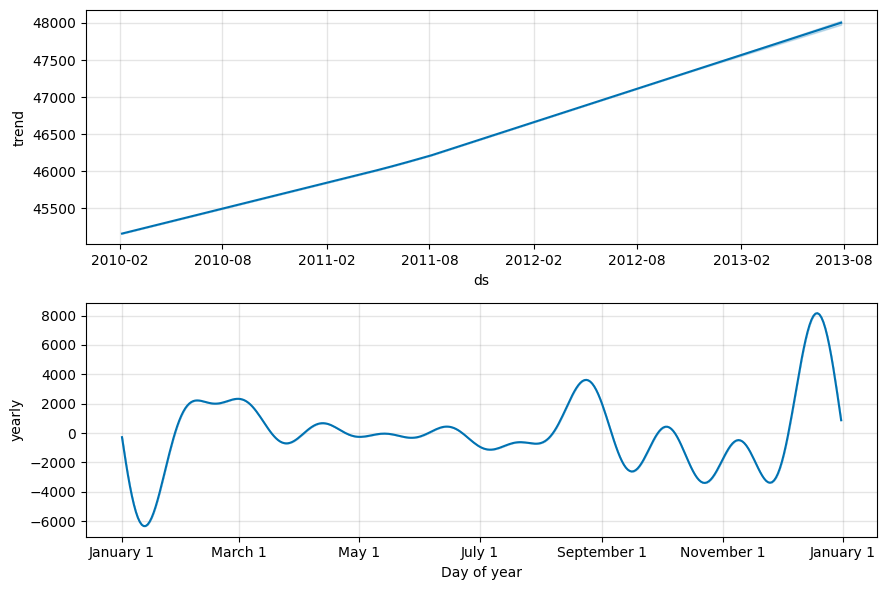

In [82]:
# Generate and display the Prophet forecast components plot.  This plot visualizes
# the trend, yearly seasonality, and other components of the forecast separately,
# allowing for analysis of their individual contributions.
components=m.plot_components(forecast)

In [83]:
# Extract the predicted sales values (yhat) for the last 52 weeks
# of the weekly_forecast DataFrame. These represent the predictions
# for the test period.
predictions = weekly_forecast.iloc[-52:]['yhat']

In [84]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())


Root Mean Squared Error between actual and  predicted values:  2343.1594108975432
Mean Value of Test Dataset: 46656.53874230769


#Here’s what these metrics suggest:

RMSE = 2343.16
This tells us the average magnitude of the error (in the same unit as the target variable). Lower RMSE values indicate better model performance.

Mean of Test Data = 46656.54
This helps put RMSE into context. You can compute the Normalized RMSE (NRMSE) by dividing RMSE by the mean of the test data:

NRMSE=RMSE/Mean of Test Data =2343.16/46656.54 ≈ 5.02%

This means that, on average, the model's predictions deviate by about 5.02% from the actual values, which is relatively low.

In [85]:
def sales_forecast(store, dept):
    """
    Forecasts weekly sales for a given store and department using the Prophet model.

    Args:
        store (int): The store number.
        dept (int): The department number.

    Returns:
        plotly.graph_objs._figure.Figure: An interactive Plotly plot of the forecast.
    """

    # Select sales data for the specified store and department.
    sales = df[(df['Store'] == store) & (df['Dept'] == dept)]

    # Rename columns to 'ds' (date) and 'y' (weekly sales) for Prophet compatibility.
    sales = sales.rename(columns={'date': 'ds', 'Weekly_Sales': 'y'})

    # Split data into training and testing sets (last 52 weeks as test).
    train = sales.iloc[:len(sales) - 52]
    test = sales.iloc[len(sales) - 52:]

    # Initialize and fit the Prophet model.
    m = Prophet()
    m.fit(train)

    # Create a future DataFrame for predictions (365 days).
    future = m.make_future_dataframe(periods=365)

    # Generate forecasts.
    forecast = m.predict(future)

    # Aggregate daily forecasts to weekly level.
    weekly_forecast = forecast.groupby(pd.Grouper(key='ds', freq='W'))[['yhat', 'yhat_lower', 'yhat_upper']].mean().reset_index()

    # Create and return the interactive Plotly forecast plot.
    plot = plot_plotly(m, weekly_forecast)

    # Extract predictions for the test period (last 52 weeks).
    predictions = weekly_forecast.iloc[-52:]['yhat']

    # Calculate RMSE and relative RMSE.
    rmse_value = rmse(predictions, test['y'])  # Assuming 'rmse' function is defined elsewhere
    test_mean = test['y'].mean()

    # Print evaluation metrics.
    print("Root Mean Squared Error between actual and predicted values: ", rmse_value)
    print("Mean Value of Test Dataset:", test_mean)
    print("Relative RMSE = (RMSE / Mean Value of Test Data) * 100")
    print("Relative RMSE = (", rmse_value, " / ", test_mean, " ) * 100 ≈ ", (rmse_value / test_mean) * 100, "%")

    return plot

In [86]:
sales_forecast(4,2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt4un2xjx/vq98744m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt4un2xjx/s1ph8pwc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86795', 'data', 'file=/tmp/tmpt4un2xjx/vq98744m.json', 'init=/tmp/tmpt4un2xjx/s1ph8pwc.json', 'output', 'file=/tmp/tmpt4un2xjx/prophet_model7oh07xd3/prophet_model-20250218134841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:48:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:48:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Root Mean Squared Error between actual and predicted values:  6573.352425330529
Mean Value of Test Dataset: 99457.14864807695
Relative RMSE = (RMSE / Mean Value of Test Data) * 100
Relative RMSE = ( 6573.352425330529  /  99457.14864807695  ) * 100 ≈  6.609230723665662 %


##2 .Model the effects of markdowns on holiday weeks


In [87]:
# Filter the DataFrame to include only rows where 'Store' is 3 and 'Dept' is 2

hday_df = df[(df['Store'] == 3)&(df['Dept'] == 2) ]
hday_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 20625 to 430352
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         182 non-null    int64         
 1   Dept          182 non-null    int64         
 2   Type          182 non-null    int64         
 3   Size          182 non-null    int64         
 4   IsHoliday     182 non-null    int64         
 5   Temperature   182 non-null    float64       
 6   Fuel_Price    182 non-null    float64       
 7   MarkDown1     182 non-null    float64       
 8   MarkDown2     182 non-null    float64       
 9   MarkDown3     182 non-null    float64       
 10  MarkDown4     182 non-null    float64       
 11  MarkDown5     182 non-null    float64       
 12  Weekly_Sales  182 non-null    float64       
 13  CPI           182 non-null    float64       
 14  Unemployment  182 non-null    float64       
 15  date          182 non-null    datetime

In [88]:
# Aggregate individual markdown columns into a single 'MarkDown' column.
hday_df['MarkDown'] = hday_df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis=1)
hday_df.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], inplace=True)

# Display the first few rows of the updated DataFrame.
hday_df.head()

,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,Weekly_Sales,CPI,Unemployment,date,MarkDown
20625,3,2,2,37392,0,45.71,2.572,17566.72,214.424881,7.368,2010-02-05,40484.8030
20626,3,2,2,37392,1,47.93,2.548,15177.30,214.574792,7.368,2010-02-12,8731.2093
20627,3,2,2,37392,0,47.07,2.514,15676.11,214.619887,7.368,2010-02-19,7896.5652
20628,3,2,2,37392,0,52.05,2.561,15112.23,214.647513,7.368,2010-02-26,8491.6191
20629,3,2,2,37392,0,53.04,2.625,16477.28,214.675139,7.368,2010-03-05,33175.5689


In [89]:
# Remove unnecessary columns ('Store', 'Dept', 'Type', 'Size').
hday_df.drop(columns=['Store', 'Dept', 'Type', 'Size'], axis=1, inplace=True)

# Keep only the relevant columns ('date', 'IsHoliday', 'Weekly_Sales', 'MarkDown').
hday_df = hday_df[['date', 'IsHoliday', 'Weekly_Sales', 'MarkDown']]

<Axes: >

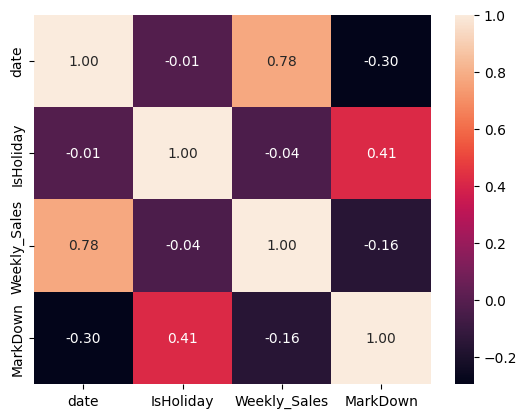

In [90]:
# Calculate the correlation matrix for the 'hday_df' DataFrame.
corr=hday_df.corr()
sns.heatmap(corr,annot=True,fmt='.2f')

In [91]:
# Rename columns for time series forecasting.
hday_df.rename(columns={'Weekly_Sales':'y','date':'ds'},inplace=True)


In [92]:
# visualizing holiday dates.
hday_df[hday_df['IsHoliday']==1]

,ds,IsHoliday,y,MarkDown
20626,2010-02-12,1,15177.3000,8731.2093
20656,2010-09-10,1,14946.4200,10503.4134
20667,2010-11-26,1,14051.2300,59693.1416
20672,2010-12-31,1,13584.2900,13692.7052
20678,2011-02-11,1,16535.4900,14596.4917
20708,2011-09-09,1,18239.5700,8039.7023
20719,2011-11-25,1,14641.2800,37869.1524
20724,2011-12-30,1,16996.3100,16730.6700
20730,2012-02-10,1,20754.9400,15007.2400
20760,2012-09-07,1,19681.7000,3640.8700


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt4un2xjx/veub32o6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt4un2xjx/aeaio9m7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64135', 'data', 'file=/tmp/tmpt4un2xjx/veub32o6.json', 'init=/tmp/tmpt4un2xjx/aeaio9m7.json', 'output', 'file=/tmp/tmpt4un2xjx/prophet_modelsn028fnm/prophet_model-20250218134924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


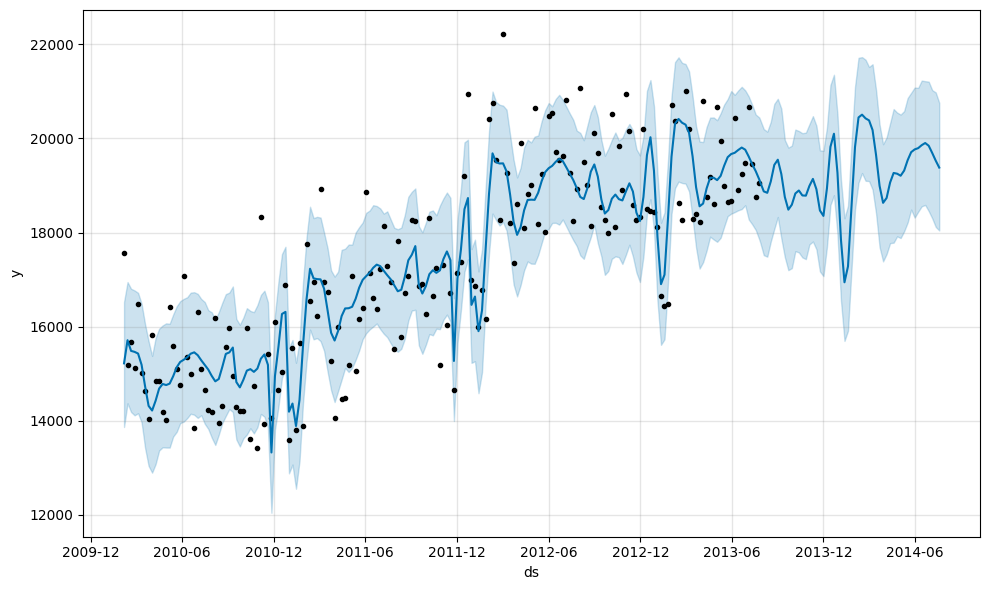

In [93]:
# Create a DataFrame for holidays with date ('ds') and holiday name ('holiday').

holidays = pd.DataFrame({
    'ds': ['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31', '2011-02-11',
           '2011-09-09', '2011-11-25', '2011-12-30', '2012-02-10'],
    'holiday': ['Valentines_Day', 'Labor_Day', 'Thanksgiving', 'New_Year', 'Valentines_Day',
                'Labor_Day', 'Thanksgiving', 'New_Year', 'Valentines_Day']
})


holidays['ds'] = holidays['ds'].str.strip()
holidays['ds'] = pd.to_datetime(holidays['ds'])

# Initialize and fit Prophet
model = Prophet(seasonality_mode='multiplicative', holidays=holidays)



# Fit model with your dataset
train = hday_df.iloc[:len(hday_df)-52]
test = hday_df.iloc[len(hday_df)-52:]

model.fit(hday_df)

# Generate future DataFrame
future = model.make_future_dataframe(periods=52, freq='W', include_history=True)



# Predict
forecast = model.predict(future)


fig = model.plot(forecast)
plt.show()




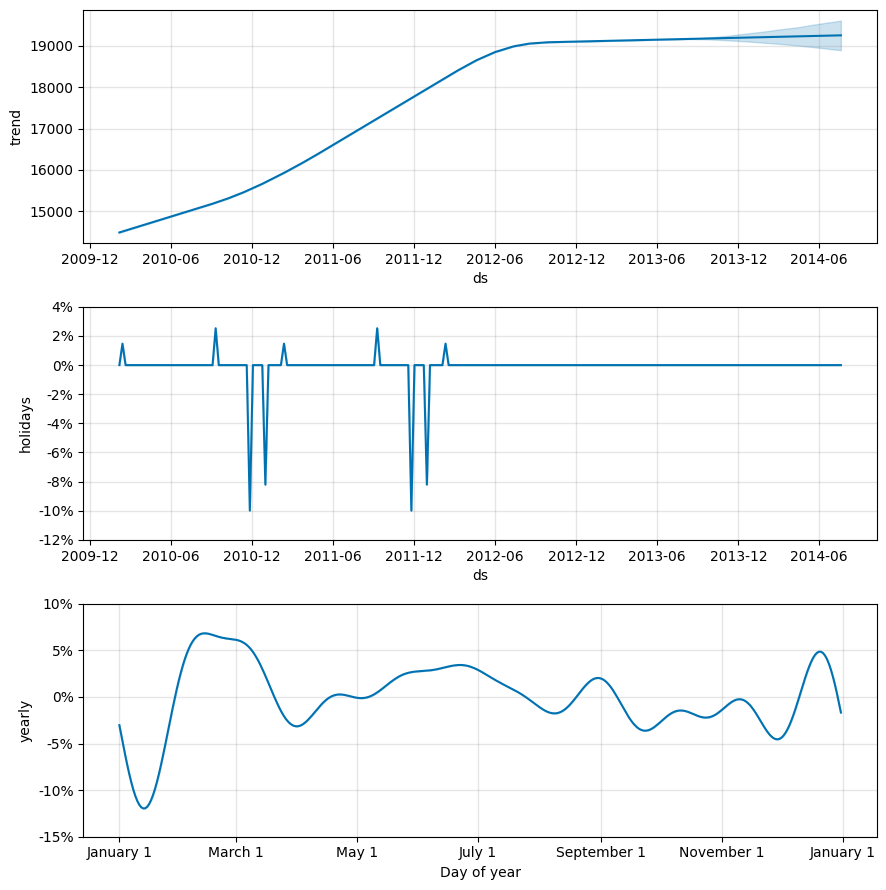

In [94]:
# Visualize and display the forecast's trend and yearly seasonality components.

fig2 = model.plot_components(forecast)
plt.show()

In [95]:
# Aggregate to weekly level
weekly = forecast.groupby(pd.Grouper(key='ds', freq='W'))[['yhat','yhat_lower','yhat_upper']].mean().reset_index()

print(weekly)

            ds          yhat    yhat_lower    yhat_upper
0   2010-02-07  15217.858921  13864.428970  16522.837107
1   2010-02-14  15710.428516  14368.851016  16946.432994
2   2010-02-21  15483.261688  14184.027686  16804.182012
3   2010-02-28  15462.439164  14113.208230  16768.353486
4   2010-03-07  15426.434822  14156.761535  16717.352260
..         ...           ...           ...           ...
228 2014-06-22  19903.029048  18586.049672  21217.401115
229 2014-06-29  19844.589517  18455.189018  21207.633021
230 2014-07-06  19691.540105  18301.601595  21027.428782
231 2014-07-13  19527.696274  18119.199776  20978.314537
232 2014-07-20  19380.293278  18043.453964  20759.257493

[233 rows x 4 columns]


In [96]:
# Create and display an interactive Plotly plot of the weekly forecast.

plot_plotly(model,weekly)

In [97]:
# Show holiday effects on the forecast.
forecast[forecast["holidays"]!= 0]["holidays"]

,holidays
1,0.014728
31,0.025284
42,-0.099884
47,-0.082062
53,0.014728
83,0.025284
94,-0.099884
99,-0.082062
105,0.014728


In [98]:
import pandas as pd

# Function to get first non-zero holiday effect
def calculate_first_non_zero_holiday_effect(forecast_model, holiday_name):
    if holiday_name not in forecast_model.columns:
        return 0  # If the holiday effect column is missing, return 0

    non_zero_effects = forecast_model[forecast_model[holiday_name] != 0][holiday_name]

    if not non_zero_effects.empty:
        return non_zero_effects.values[0]
    return 0  # If all values are zero, return 0

# Function to create a DataFrame of holiday effects
def create_holiday_effect_dataframe(model, forecast):
    unique_holidays = model.holidays['holiday'].unique()  # Get list of unique holiday names

    holiday_effects = [calculate_first_non_zero_holiday_effect(forecast, holiday)
                       for holiday in unique_holidays]

    return pd.DataFrame({'holiday': unique_holidays, 'effect': holiday_effects})

# Compute holiday effects
holiday_effect_df = create_holiday_effect_dataframe(model, forecast)

# Display the effects
print(holiday_effect_df)


          holiday    effect
0  Valentines_Day  0.014728
1       Labor_Day  0.025284
2    Thanksgiving -0.099884
3        New_Year -0.082062


#effects of weekly_sales holidays week

In [99]:


def holiday_effect(store,dept):

  """
  Analyzes the impact of holidays on sales for a given store and department using Prophet.

  Args:
      store (int): The store number.
      dept (int): The department number.

  Returns:
      tuple: A tuple containing the forecast plot, the components plot, and a DataFrame
              of holiday effects.
  """

  hday_df = df[(df['Store'] == store) &(df['Dept'] == dept) ]
  hday_df['MarkDown']=hday_df['MarkDown1']+hday_df['MarkDown2']+hday_df['MarkDown3']+hday_df['MarkDown4']+hday_df['MarkDown5']
  hday_df.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)
  hday_df.drop(columns=['Store', 'Dept', 'Type', 'Size'],axis=1,inplace=True)
  hday_df=hday_df[['date','IsHoliday','Weekly_Sales','MarkDown']]
  hday_df.rename(columns={'Weekly_Sales':'y','date':'ds'},inplace=True)



  holidays = pd.DataFrame({
    'ds': ['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31', '2011-02-11',
            '2011-09-09', '2011-11-25', '2011-12-30', '2012-02-10'],
    'holiday': ['Valentines_Day', 'Labor_Day', 'Thanksgiving', 'New_Year', 'Valentines_Day',
                'Labor_Day', 'Thanksgiving', 'New_Year', 'Valentines_Day']
  })


  holidays['ds'] = holidays['ds'].str.strip()
  holidays['ds'] = pd.to_datetime(holidays['ds'])

  # Initialize and fit Prophet
  model = Prophet(seasonality_mode='multiplicative', holidays=holidays)



  # Fit model with your dataset
  train = hday_df.iloc[:len(hday_df)-52]
  test = hday_df.iloc[len(hday_df)-52:]

  model.fit(hday_df)

  # Generate future DataFrame
  future = model.make_future_dataframe(periods=52, freq='W', include_history=True)

  # Predict
  forecast = model.predict(future)

  plot = model.plot(forecast)
  components = model.plot_components(forecast)


    # Function to get first non-zero holiday effect
  def calculate_first_non_zero_holiday_effect(forecast_model, holiday_name):
      if holiday_name not in forecast_model.columns:
          return 0  # If the holiday effect column is missing, return 0

      non_zero_effects = forecast_model[forecast_model[holiday_name] != 0][holiday_name]

      if not non_zero_effects.empty:
          return non_zero_effects.values[0]
      return 0  # If all values are zero, return 0

  # Function to create a DataFrame of holiday effects
  def create_holiday_effect_dataframe(model, forecast):
      unique_holidays = model.holidays['holiday'].unique()  # Get list of unique holiday names

      holiday_effects = [calculate_first_non_zero_holiday_effect(forecast, holiday)
                        for holiday in unique_holidays]

      return pd.DataFrame({'holiday': unique_holidays, 'effect': holiday_effects})

  # Compute holiday effects
  holiday_effect_df = create_holiday_effect_dataframe(model, forecast)



  return plot, components, holiday_effect_df

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt4un2xjx/n5uoxcby.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt4un2xjx/orghbt6v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98985', 'data', 'file=/tmp/tmpt4un2xjx/n5uoxcby.json', 'init=/tmp/tmpt4un2xjx/orghbt6v.json', 'output', 'file=/tmp/tmpt4un2xjx/prophet_model4gm42pq1/prophet_model-20250218134935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


(<Figure size 1000x600 with 1 Axes>,
 <Figure size 900x900 with 3 Axes>,
           holiday    effect
 0  Valentines_Day  0.014728
 1       Labor_Day  0.025284
 2    Thanksgiving -0.099884
 3        New_Year -0.082062)

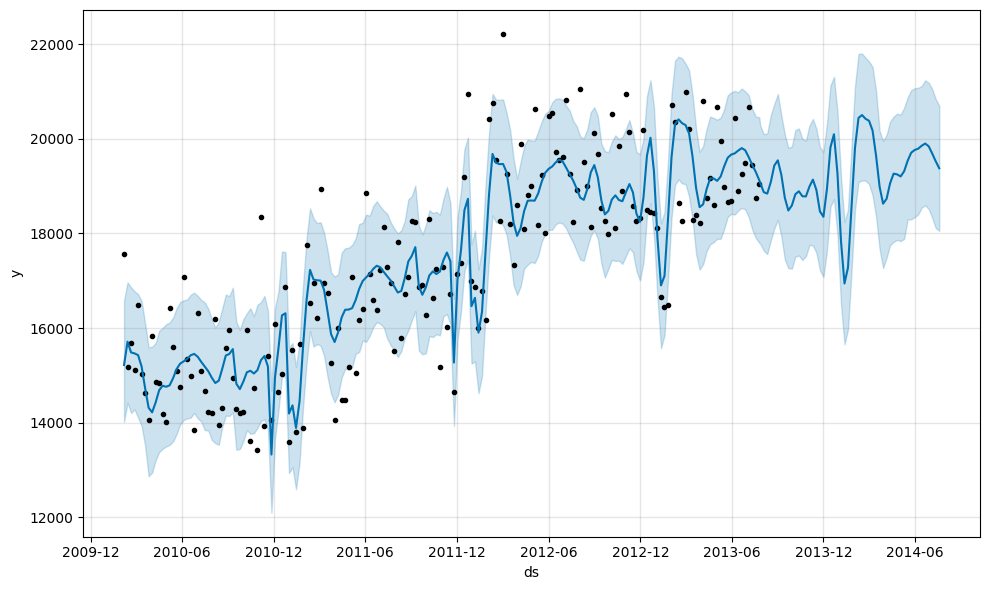

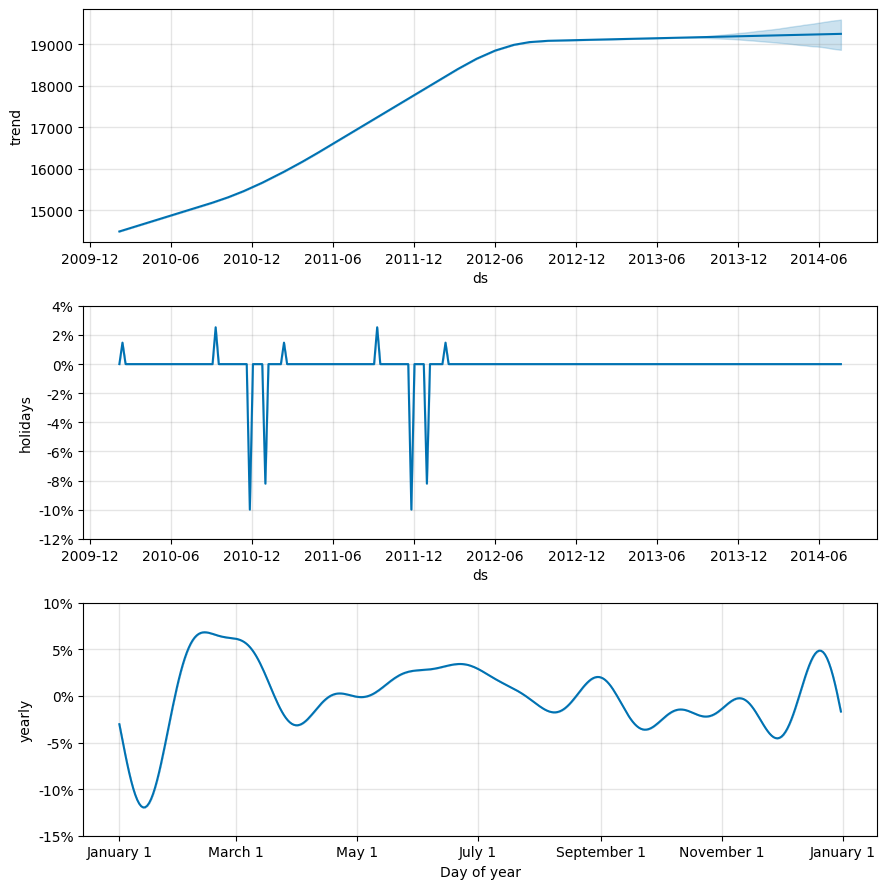

In [100]:
holiday_effect(3,2)

##effects of markdowns on holiday weeks


In [101]:
def Markdown_holiday_effect(store,dept):

  """
    Analyzes the impact of holidays on MarkDowns for a given store and department using Prophet.

    Args:
        store (int): The store number.
        dept (int): The department number.

    Returns:
        tuple: A tuple containing the forecast plot, the components plot, and a DataFrame
               of holiday effects on MarkDowns.
    """

  hday_df = df[(df['Store'] == store) &(df['Dept'] == dept) ]
  hday_df['MarkDown']=hday_df['MarkDown1']+hday_df['MarkDown2']+hday_df['MarkDown3']+hday_df['MarkDown4']+hday_df['MarkDown5']
  hday_df.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)
  hday_df.drop(columns=['Store', 'Dept', 'Type', 'Size'],axis=1,inplace=True)
  hday_df=hday_df[['date','IsHoliday','Weekly_Sales','MarkDown']]
  hday_df.rename(columns={'MarkDown':'y','date':'ds'},inplace=True)



  holidays = pd.DataFrame({
    'ds': ['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31', '2011-02-11',
            '2011-09-09', '2011-11-25', '2011-12-30', '2012-02-10'],
    'holiday': ['Valentines_Day', 'Labor_Day', 'Thanksgiving', 'New_Year', 'Valentines_Day',
                'Labor_Day', 'Thanksgiving', 'New_Year', 'Valentines_Day']
  })


  holidays['ds'] = holidays['ds'].str.strip()
  holidays['ds'] = pd.to_datetime(holidays['ds'])

  # Initialize and fit Prophet
  model = Prophet(seasonality_mode='multiplicative', holidays=holidays)



  # Fit model with your dataset
  train = hday_df.iloc[:len(hday_df)-52]
  test = hday_df.iloc[len(hday_df)-52:]

  model.fit(hday_df)

  # Generate future DataFrame
  future = model.make_future_dataframe(periods=52, freq='W', include_history=True)

  # Predict
  forecast = model.predict(future)

  plot = model.plot(forecast)
  components = model.plot_components(forecast)


    # Function to get first non-zero holiday effect
  def calculate_first_non_zero_holiday_effect(forecast_model, holiday_name):
      if holiday_name not in forecast_model.columns:
          return 0  # If the holiday effect column is missing, return 0

      non_zero_effects = forecast_model[forecast_model[holiday_name] != 0][holiday_name]

      if not non_zero_effects.empty:
          return non_zero_effects.values[0]
      return 0  # If all values are zero, return 0

  # Function to create a DataFrame of holiday effects
  def create_holiday_effect_dataframe(model, forecast):
      unique_holidays = model.holidays['holiday'].unique()  # Get list of unique holiday names

      holiday_effects = [calculate_first_non_zero_holiday_effect(forecast, holiday)
                        for holiday in unique_holidays]

      return pd.DataFrame({'holiday': unique_holidays, 'effect': holiday_effects})

  # Compute holiday effects
  holiday_effect_df = create_holiday_effect_dataframe(model, forecast)



  return plot, components, holiday_effect_df

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt4un2xjx/ewscyd9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt4un2xjx/u30bq9j5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20586', 'data', 'file=/tmp/tmpt4un2xjx/ewscyd9i.json', 'init=/tmp/tmpt4un2xjx/u30bq9j5.json', 'output', 'file=/tmp/tmpt4un2xjx/prophet_modelguo6r1d4/prophet_model-20250218135006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:50:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:50:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


(<Figure size 1000x600 with 1 Axes>,
 <Figure size 900x900 with 3 Axes>,
           holiday    effect
 0  Valentines_Day -0.164344
 1       Labor_Day -0.037592
 2    Thanksgiving  0.320619
 3        New_Year  0.025130)

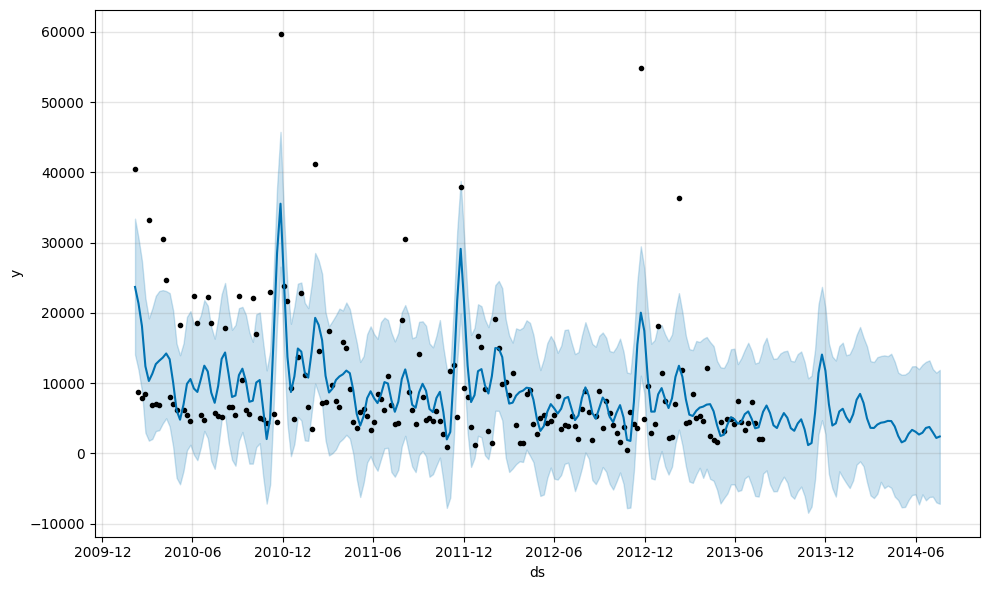

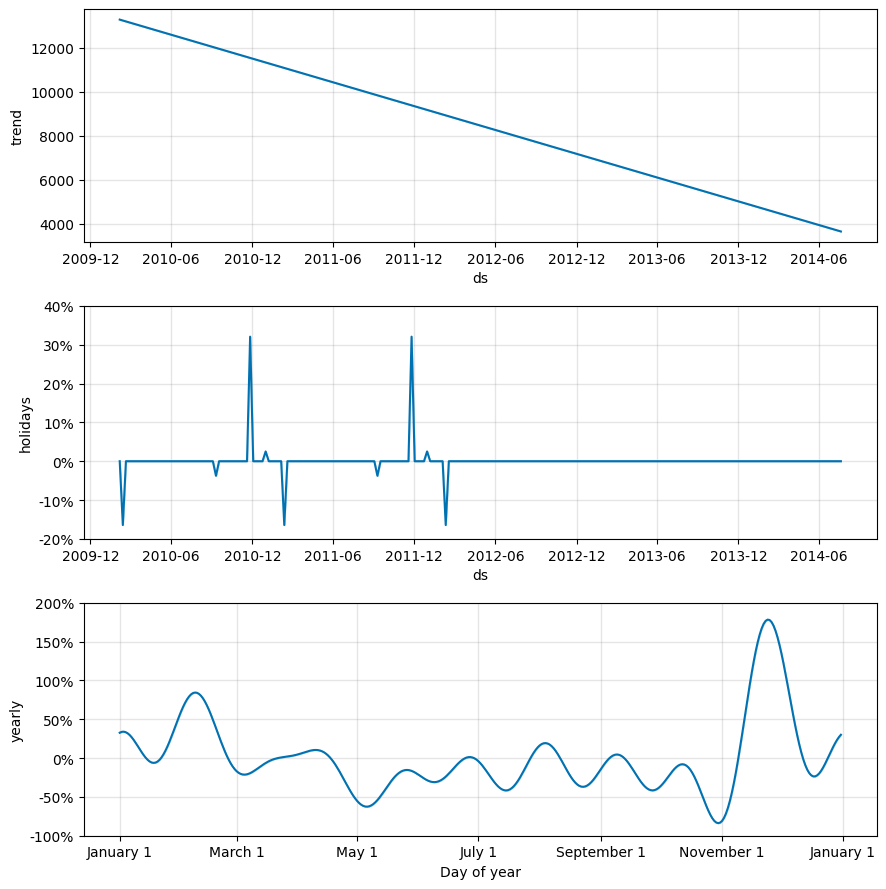

In [102]:
Markdown_holiday_effect(3,2)

#Prioritized Recommendations:





#Upward Sales Trend ->>  Sales are increasing over time.
#Seasonal Patterns ->>  Sales spikes occur in January, March, September,November, and December with dips at other times.

#Actionable Recommendations (Prioritized)

#Leverage Seasonal Demand (High Priority )
1.Target Marketing Campaigns around the high-sales months (January, March, September, November, and December).

2.Increase promotions & discounts before peak demand periods to maximize revenue.
#Optimize Inventory Management (High Priority)
1.Stock up before high-sales months to prevent shortages.

2.Reduce excess inventory before sales dips to avoid overstocking costs.
#Pricing & Markdown Strategy (Medium Priority )
1.Increase markdowns before slow months to boost sales.

2.Optimize markdowns during peak months to balance profit margins and volume.
#Holiday-Specific Promotions (Medium Priority )
1.Special promotions during November & December (Holiday shopping season).

2.Consider targeted discounts or exclusive product launches in January & March.
#Improve Forecasting & Supply Chain Planning (Low Priority )

1.Ensure suppliers are prepared for increased seasonal demand.











